Accuracy: 0.7792207792207793
Confusion Matrix:
 [[80 19]
 [15 40]]
Precision: 0.7834841340639734
Recall: 0.7792207792207793
F1 Score: 0.7808180244425496


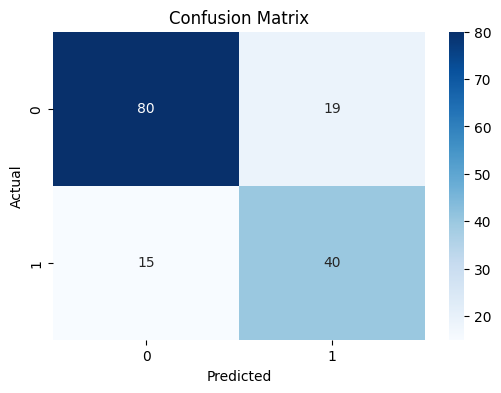

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("diabetes.csv")  
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost classifier
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

# Train the model
abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=abc.classes_,
            yticklabels=abc.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()